In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

In [3]:
cleaned_dataset = pd.read_csv("World_Marriage_Cleaned_Dataset.csv")

In [4]:
cleaned_dataset

Country Age Group    Sex Marital Status Data Process  Start Year  \
0       Afghanistan   [15-19]    Man       Divorced       Survey        1972   
1       Afghanistan   [20-24]    Man       Divorced       Survey        1972   
2       Afghanistan   [25-29]    Man       Divorced       Survey        1972   
3       Afghanistan   [30-34]    Man       Divorced       Survey        1972   
4       Afghanistan   [35-39]    Man       Divorced       Survey        1972   
...             ...       ...    ...            ...          ...         ...   
228211     Zimbabwe   [55-59]  Woman        Widowed       Survey        2017   
228212     Zimbabwe   [60-64]  Woman        Widowed       Survey        2017   
228213     Zimbabwe   [65-69]  Woman        Widowed       Survey        2017   
228214     Zimbabwe   [70-74]  Woman        Widowed       Survey        2017   
228215     Zimbabwe     [75+]  Woman        Widowed       Survey        2017   

        End Year          Data Source  
0           1974  National statistics  
1           1974  National statistics  
2           1974  National statistics  
3           1974  National statistics  
4           1974  National statistics  
...          ...                  ...  
228211      2017  National statistics  
228212      2017  National statistics  
228213      2017  National statistics  
228214      2017  National statistics  
228215      2017  National statistics  

[228216 rows x 8 columns]

In [5]:
# Verify and correct column names if needed
cleaned_dataset.columns = cleaned_dataset.columns.str.strip()  # Remove any leading/trailing whitespace

In [6]:
if 'Count' not in cleaned_dataset.columns:
    cleaned_dataset['Count'] = 1

In [7]:
# Assuming 'east_countries_data' is already loaded

# Extract relevant columns for all age groups
relevant_data = cleaned_dataset[['Country', 'Marital Status', 'Count']]

# Pivot the data to get counts per country and age group
DBSCAN_pivot = relevant_data.pivot_table(index='Country', columns='Marital Status', values='Count', aggfunc='sum', fill_value=0).reset_index()

# Print columns to confirm
print(DBSCAN_pivot.columns)

# Show the first few rows to inspect
print(DBSCAN_pivot.head())

Index(['Country', 'Divorced', 'Married', 'Separated', 'Single', 'Widowed'], dtype='object', name='Marital Status')
Marital Status         Country  Divorced  Married  Separated  Single  Widowed
0                  Afghanistan       100      116         14      71      116
1                      Albania       141      185         61      91      191
2                      Algeria       129      162         57     129      160
3               American Samoa        84       86         58      90       86
4                       Angola       101       95         87      48      121


In [8]:
# Count the total number of people for each country
DBSCAN_pivot['Total_People'] = DBSCAN_pivot.drop(columns='Country').sum(axis=1)

# Show the updated pivot table with total counts
print(DBSCAN_pivot.head())


Marital Status         Country  Divorced  Married  Separated  Single  Widowed  \
0                  Afghanistan       100      116         14      71      116   
1                      Albania       141      185         61      91      191   
2                      Algeria       129      162         57     129      160   
3               American Samoa        84       86         58      90       86   
4                       Angola       101       95         87      48      121   

Marital Status  Total_People  
0                        417  
1                        669  
2                        637  
3                        404  
4                        452  


In [9]:
from sklearn.preprocessing import StandardScaler

# Standardize the features
X = DBSCAN_pivot.drop(columns=['Country', 'Total_People'])  # Dropping Country and Total_People for clustering
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [10]:
# Apply DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)  # Adjust parameters as needed
clusters = dbscan.fit_predict(X_scaled)

# Add cluster labels to the dataset
DBSCAN_pivot['Cluster'] = clusters

In [11]:
print(DBSCAN_pivot.columns)

Index(['Country', 'Divorced', 'Married', 'Separated', 'Single', 'Widowed',
       'Total_People', 'Cluster'],
      dtype='object', name='Marital Status')


In [12]:
# Evaluate clustering - Cluster labels distribution
print("Cluster labels distribution:")
print(DBSCAN_pivot['Cluster'].value_counts())

Cluster labels distribution:
 0    198
-1     29
 1      7
Name: Cluster, dtype: int64


Cluster labels distribution:
 0    198
-1     29
 1      7
Name: Cluster, dtype: int64


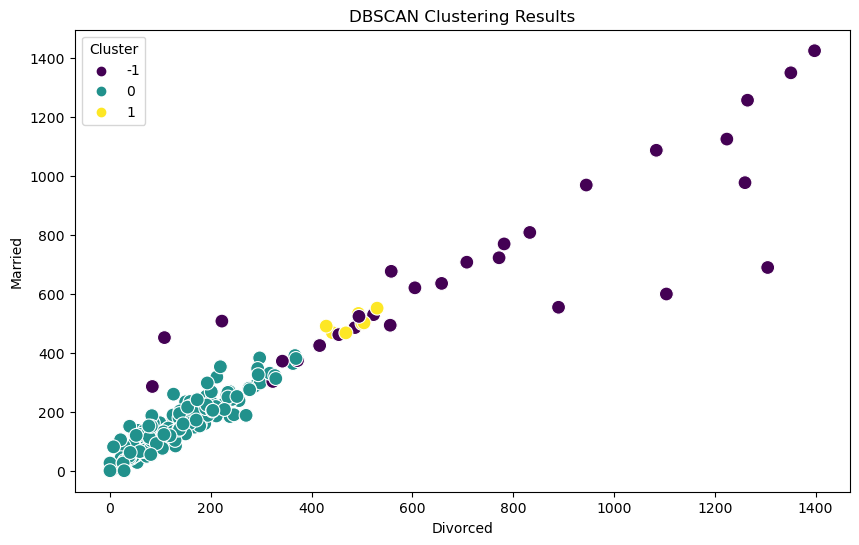

In [13]:
# Add cluster labels to the dataset
DBSCAN_pivot['Cluster'] = clusters

# Evaluate clustering - Cluster labels distribution
print("Cluster labels distribution:")
print(DBSCAN_pivot['Cluster'].value_counts())

# Visualization using two marital statuses (adjust the column names accordingly)
plt.figure(figsize=(10, 6))
sns.scatterplot(x=DBSCAN_pivot[DBSCAN_pivot.columns[1]], y=DBSCAN_pivot[DBSCAN_pivot.columns[2]], hue=DBSCAN_pivot['Cluster'], palette='viridis', s=100)
plt.title('DBSCAN Clustering Results')
plt.xlabel(DBSCAN_pivot.columns[1])
plt.ylabel(DBSCAN_pivot.columns[2])
plt.legend(title='Cluster')
plt.show()

In [14]:
outliers = DBSCAN_pivot[DBSCAN_pivot['Cluster'] == -1]
print("Outliers:")
print(outliers)

Outliers:
Marital Status                   Country  Divorced  Married  Separated  \
10                             Australia       486      486        236   
33                                Canada      1104      600        332   
39                                 Chile       108      452        442   
41                              Colombia        84      286         48   
44                            Costa Rica       523      530        523   
49                        Czech Republic       708      708          0   
51                               Denmark      1305      690        140   
64                         Faroe Islands       323      303        237   
67                               Finland      1224     1126         56   
68                                France       945      970          0   
78                             Greenland       890      555         56   
89                               Hungary      1398     1426         54   
90                          

Cluster labels distribution (without outliers):
0    198
1      7
Name: Cluster, dtype: int64


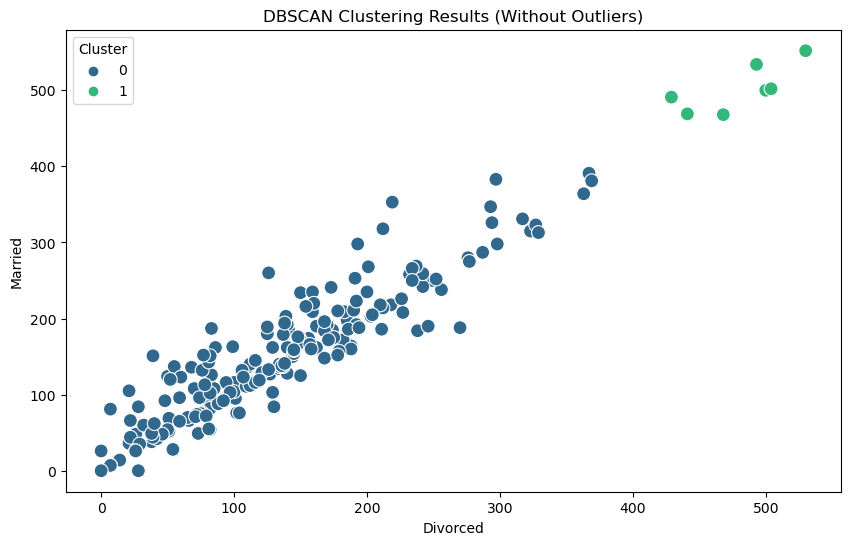

In [15]:
# Add cluster labels to the dataset
DBSCAN_pivot['Cluster'] = clusters

# Remove outliers (DBSCAN labels outliers as -1)
DBSCAN_no_outliers = DBSCAN_pivot[DBSCAN_pivot['Cluster'] != -1]

# Evaluate clustering - Cluster labels distribution without outliers
print("Cluster labels distribution (without outliers):")
print(DBSCAN_no_outliers['Cluster'].value_counts())

# Visualization without outliers using two marital statuses (adjust the column names accordingly)
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=DBSCAN_no_outliers[DBSCAN_no_outliers.columns[1]], 
    y=DBSCAN_no_outliers[DBSCAN_no_outliers.columns[2]], 
    hue=DBSCAN_no_outliers['Cluster'], 
    palette='viridis', 
    s=100
)
plt.title('DBSCAN Clustering Results (Without Outliers)')
plt.xlabel(DBSCAN_no_outliers.columns[1])
plt.ylabel(DBSCAN_no_outliers.columns[2])
plt.legend(title='Cluster')
plt.show()


In [16]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Load the world map from Natural Earth (this approach should work with newer versions)
shapefile_path = r"C:/Users/user/Desktop/ne_10m_admin_0_countries/ne_10m_admin_0_countries.shp"

# Load the shapefile
world = gpd.read_file(shapefile_path)

# Check the columns
print(world.columns)

world

Index(['scalerank', 'featurecla', 'LABELRANK', 'SOVEREIGNT', 'SOV_A3',
       'ADM0_DIF', 'LEVEL', 'TYPE', 'ADMIN', 'ADM0_A3', 'GEOU_DIF', 'GEOUNIT',
       'GU_A3', 'SU_DIF', 'SUBUNIT', 'SU_A3', 'BRK_DIFF', 'NAME', 'NAME_LONG',
       'BRK_A3', 'BRK_NAME', 'BRK_GROUP', 'ABBREV', 'POSTAL', 'FORMAL_EN',
       'FORMAL_FR', 'NOTE_ADM0', 'NOTE_BRK', 'NAME_SORT', 'NAME_ALT',
       'MAPCOLOR7', 'MAPCOLOR8', 'MAPCOLOR9', 'MAPCOLOR13', 'POP_EST',
       'GDP_MD_EST', 'POP_YEAR', 'LASTCENSUS', 'GDP_YEAR', 'ECONOMY',
       'INCOME_GRP', 'WIKIPEDIA', 'FIPS_10_', 'ISO_A2', 'ISO_A3', 'ISO_N3',
       'UN_A3', 'WB_A2', 'WB_A3', 'WOE_ID', 'WOE_ID_EH', 'WOE_NOTE',
       'ADM0_A3_IS', 'ADM0_A3_US', 'ADM0_A3_UN', 'ADM0_A3_WB', 'CONTINENT',
       'REGION_UN', 'SUBREGION', 'REGION_WB', 'NAME_LEN', 'LONG_LEN',
       'ABBREV_LEN', 'TINY', 'HOMEPART', 'geometry'],
      dtype='object')


scalerank       featurecla  LABELRANK      SOVEREIGNT SOV_A3  ADM0_DIF  \
0            3  Admin-0 country        5.0     Netherlands    NL1       1.0   
1            0  Admin-0 country        3.0     Afghanistan    AFG       0.0   
2            0  Admin-0 country        3.0          Angola    AGO       0.0   
3            3  Admin-0 country        6.0  United Kingdom    GB1       1.0   
4            0  Admin-0 country        6.0         Albania    ALB       0.0   
..         ...              ...        ...             ...    ...       ...   
250          3  Admin-0 country        4.0           Samoa    WSM       0.0   
251          0  Admin-0 country        3.0           Yemen    YEM       0.0   
252          0  Admin-0 country        2.0    South Africa    ZAF       0.0   
253          0  Admin-0 country        3.0          Zambia    ZMB       0.0   
254          0  Admin-0 country        3.0        Zimbabwe    ZWE       0.0   

     LEVEL               TYPE         ADMIN ADM0_A3  ...      CONTINENT  \
0      2.0            Country         Aruba     ABW  ...  North America   
1      2.0  Sovereign country   Afghanistan     AFG  ...           Asia   
2      2.0  Sovereign country        Angola     AGO  ...         Africa   
3      2.0         Dependency      Anguilla     AIA  ...  North America   
4      2.0  Sovereign country       Albania     ALB  ...         Europe   
..     ...                ...           ...     ...  ...            ...   
250    2.0  Sovereign country         Samoa     WSM  ...        Oceania   
251    2.0  Sovereign country         Yemen     YEM  ...           Asia   
252    2.0  Sovereign country  South Africa     ZAF  ...         Africa   
253    2.0  Sovereign country        Zambia     ZMB  ...         Africa   
254    2.0  Sovereign country      Zimbabwe     ZWE  ...         Africa   

    REGION_UN        SUBREGION                   REGION_WB NAME_LEN LONG_LEN  \
0    Americas        Caribbean   Latin America & Caribbean      5.0      5.0   
1        Asia    Southern Asia                  South Asia     11.0     11.0   
2      Africa    Middle Africa          Sub-Saharan Africa      6.0      6.0   
3    Americas        Caribbean   Latin America & Caribbean      8.0      8.0   
4      Europe  Southern Europe       Europe & Central Asia      7.0      7.0   
..        ...              ...                         ...      ...      ...   
250   Oceania        Polynesia         East Asia & Pacific      5.0      5.0   
251      Asia     Western Asia  Middle East & North Africa      5.0      5.0   
252    Africa  Southern Africa          Sub-Saharan Africa     12.0     12.0   
253    Africa   Eastern Africa          Sub-Saharan Africa      6.0      6.0   
254    Africa   Eastern Africa          Sub-Saharan Africa      8.0      8.0   

     ABBREV_LEN  TINY HOMEPART  \
0           5.0   4.0    -99.0   
1           4.0 -99.0      1.0   
2           4.0 -99.0      1.0   
3           4.0 -99.0    -99.0   
4           4.0 -99.0      1.0   
..          ...   ...      ...   
250         5.0 -99.0      1.0   
251         4.0 -99.0      1.0   
252         5.0 -99.0      1.0   
253         6.0 -99.0      1.0   
254         5.0 -99.0      1.0   

                                              geometry  
0    POLYGON ((-69.99694 12.57758, -69.93639 12.531...  
1    POLYGON ((71.0498 38.40866, 71.05714 38.40903,...  
2    MULTIPOLYGON (((11.73752 -16.69258, 11.73851 -...  
3    MULTIPOLYGON (((-63.03767 18.21296, -63.09952 ...  
4    POLYGON ((19.74777 42.5789, 19.74601 42.57993,...  
..                                                 ...  
250  MULTIPOLYGON (((-171.57002 -13.93816, -171.564...  
251  MULTIPOLYGON (((53.30824 12.11839, 53.31027 12...  
252  MULTIPOLYGON (((37.86378 -46.94085, 37.83644 -...  
253  POLYGON ((31.11984 -8.61663, 31.14102 -8.60619...  
254  POLYGON ((30.01065 -15.64623, 30.05024 -15.640...  

[255 rows x 66 columns]

<Axes: >

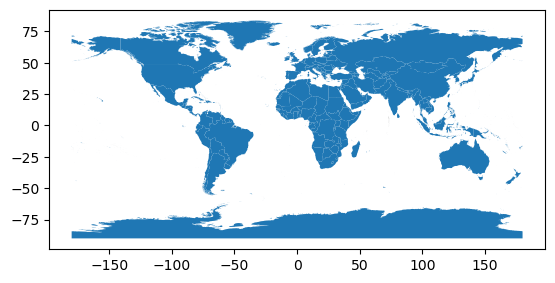

In [17]:
world.plot()

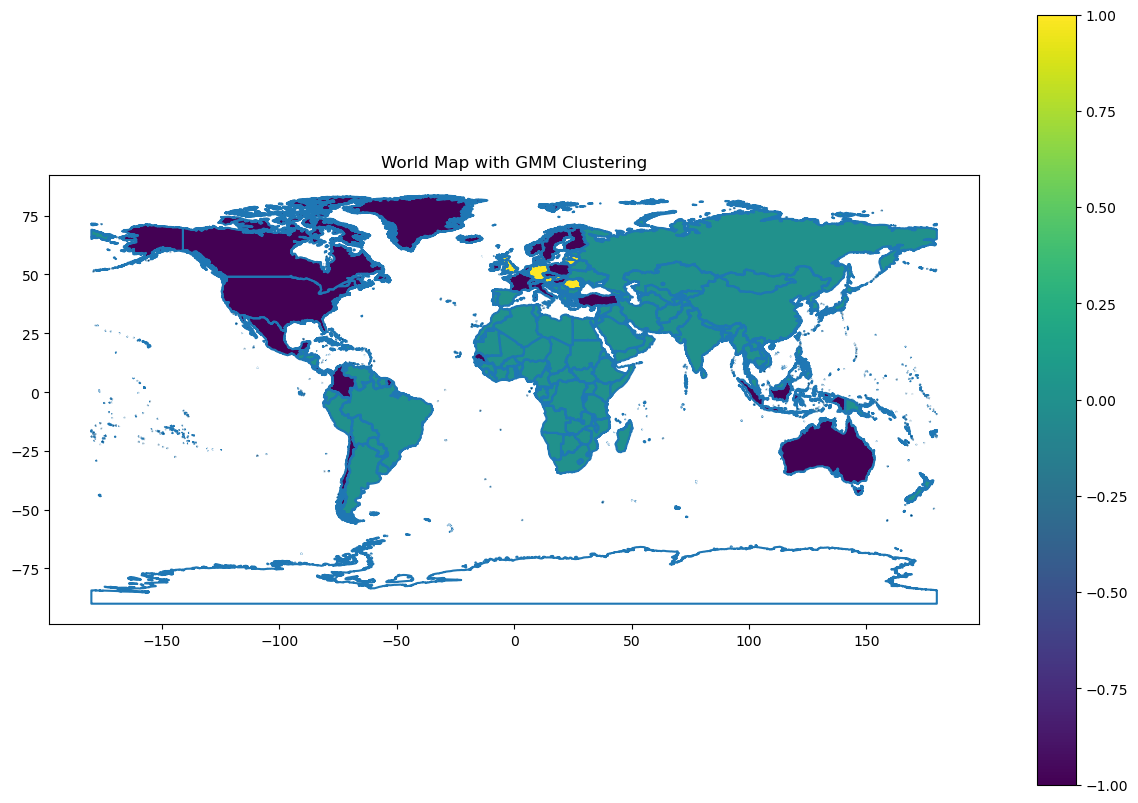

In [18]:
# Merge with clustering results
world_clusters = world.merge(DBSCAN_pivot[['Country', 'Cluster']], how='left', left_on='ADMIN', right_on='Country')

# Plot the world map with clusters
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
world.boundary.plot(ax=ax)
world_clusters.plot(column='Cluster', ax=ax, legend=True, cmap='viridis', edgecolor='k', linewidth=0.5)
plt.title('World Map with GMM Clustering')
plt.show()

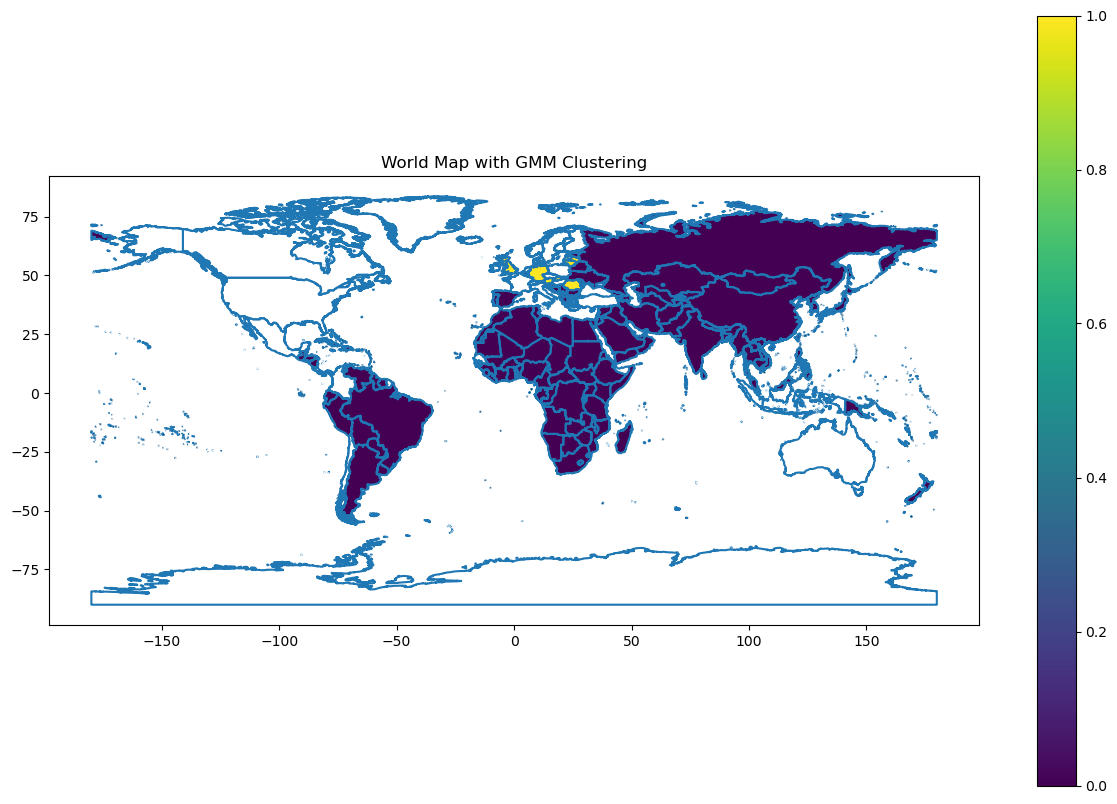

In [19]:
# Merge with clustering results
world_clusters = world.merge(DBSCAN_no_outliers[['Country', 'Cluster']], how='left', left_on='ADMIN', right_on='Country')

# Plot the world map with clusters
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
world.boundary.plot(ax=ax)
world_clusters.plot(column='Cluster', ax=ax, legend=True, cmap='viridis', edgecolor='k', linewidth=0.5)
plt.title('World Map with GMM Clustering')
plt.show()

In [20]:
import pandas as pd
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# For Silhouette Score
from sklearn.metrics import silhouette_score


KeyError: "['Count'] not in index"

In [41]:

# Standardize the features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(pivot_df)

# Apply DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)  # Adjust eps and min_samples as needed
clusters = dbscan.fit_predict(scaled_data)

# Add cluster labels to the DataFrame
pivot_df['Cluster'] = clusters

# Analyze the clusters
print(pivot_df.groupby('Cluster').mean())  # Means of each feature per cluster

# Plot the clusters (if applicable, depends on data dimensionality)
plt.figure(figsize=(10, 8))
sns.scatterplot(x=pivot_df.index, y=pivot_df['Age Group'], hue=pivot_df['Cluster'], palette='viridis')
plt.title('Clusters of Marriage Patterns by Country')
plt.xlabel('Country')
plt.ylabel('Age Group')
plt.legend(title='Cluster')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

Age Group    [0-14]    [0-15]    [0-19]   [10-14]   [10-19]   [12-14]  \
Cluster                                                                 
-1         0.052632  0.070175  0.008772  0.798246  0.035088  0.035088   
 0         0.000000  0.000000  0.000000  1.000000  0.000000  0.000000   
 1         0.000000  0.000000  0.000000  1.000000  0.000000  0.000000   
 2         0.000000  0.000000  0.000000  1.000000  0.000000  0.000000   
 3         0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
 4         0.000000  0.000000  0.000000  1.000000  0.000000  0.000000   
 5         0.000000  0.000000  0.000000  1.000000  0.000000  0.000000   
 6         0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   

Age Group   [12-19]   [14-19]   [15-17]   [15-19]  ...   [60-74]     [65+]  \
Cluster                                            ...                       
-1         0.008772  0.017544  0.035088  0.991228  ...  0.052632  0.561404   
 0         0.000000  0.000000  0.00

KeyError: 'Age Group'

<Figure size 1000x800 with 0 Axes>